<a href="https://colab.research.google.com/github/Frankc17/EXAMEN-PYTHON-2/blob/main/FRANK_ANTONY_COBE%C3%91AS_VASQUEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>EXAMEN FINAL: ANALISIS DE DATOS CON PYTHON</p>
<p>NOMBRE: FRANK ANTONY COBEÑAS VASQUEZ</p>
DNI: 76436513

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
Establezca 2 modelos de clasificación para el data Iirs
"""

In [3]:
"""
Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from sklearn.impute import SimpleImputer

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import recall_score, precision_score

ruta = 'https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv'
dfm = pd.read_csv(ruta)


imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data = imputer.fit_transform(dfm)

data = pd.DataFrame(data, columns = ['Suburb','Address','Rooms','Type','Price','Method','SellerG','Date',
                                     'Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea',
                                     'YearBuilt','CouncilArea','Lattitude','Longtitude','Regionname','Propertycount'])

data = data.drop(columns = ['Address','Date','Postcode']) 

encoder = LabelEncoder()
for column in ['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']:
    data[column] = encoder.fit_transform(data[column])

scaler = MinMaxScaler()
x_price = np.array(data['Price'])
np_price = np.reshape(x_price, (len(x_price), 1))
data['Price'] = scaler.fit_transform(np_price)

x = np.array(data.drop(columns=['Type']))
y = np.array(data['Type'])

pca_ = PCA(n_components = 2)
x_pca = pca_.fit_transform(x)

#CON PCA
xtrain, xtest, ytrain, ytest = tts(x_pca, y, test_size=0.20, random_state = 42)
modelo_GBC = GradientBoostingClassifier(max_depth = 5)
modelo_GBC.fit(xtrain, ytrain)
y_predict_train = modelo_GBC.predict(xtrain)
y_predict_test = modelo_GBC.predict(xtest)


#SIN PCA
xtrain2, xtest2, ytrain2, ytest2 = tts(x, y, test_size=0.20, random_state = 42)
modelo_GBC2 = GradientBoostingClassifier(max_depth = 5)
modelo_GBC2.fit(xtrain2, ytrain2)
y_predict_train2 = modelo_GBC2.predict(xtrain2)
y_predict_test2 = modelo_GBC2.predict(xtest2)


print('Usando Stochastic Gradient Boosting CON PCA')
print()

score_total_train = modelo_GBC.score(xtrain, ytrain)
score_total_test = modelo_GBC.score(xtest, ytest)
recall_train = recall_score(ytrain, y_predict_train, average = 'micro')
precision_train = precision_score(ytrain, y_predict_train, average = 'micro')
recall_test = recall_score(ytest, y_predict_test, average = 'micro')
precision_test = precision_score(ytest, y_predict_test, average = 'micro')
print(f'Puntaje recall entrenamiento es {round(recall_train, 4)}')
print(f'Puntaje precisión entrenamiento es {round(precision_train, 4)}')
print(f'Puntaje recall validación es {round(recall_test, 4)}')
print(f'Puntaje precisión validación es {round(precision_test, 4)}')
print(f'Score validación es {round(score_total_test, 4)}')
print(f'Score entrenamiento es {round(score_total_train, 4)}')

print()
print('Usando Stochastic Gradient Boosting SIN PCA')
print()

score_total_train2 = modelo_GBC2.score(xtrain2, ytrain2)
score_total_test2 = modelo_GBC2.score(xtest2, ytest2)
recall_train2 = recall_score(ytrain2, y_predict_train2, average = 'micro')
precision_train2 = precision_score(ytrain2, y_predict_train2, average = 'micro')
recall_test2 = recall_score(ytest2, y_predict_test2, average = 'micro')
precision_test2 = precision_score(ytest2, y_predict_test2, average = 'micro')
print(f'Puntaje recall entrenamiento es {round(recall_train2, 4)}')
print(f'Puntaje precisión entrenamiento es {round(precision_train2, 4)}')
print(f'Puntaje recall validación es {round(recall_test2, 4)}')
print(f'Puntaje precisión validación es {round(precision_test2, 4)}')
print(f'Score validación es {round(score_total_test2, 4)}')
print(f'Score entrenamiento es {round(score_total_train2, 4)}')

Usando Stochastic Gradient Boosting CON PCA

Puntaje recall entrenamiento es 0.8687
Puntaje precisión entrenamiento es 0.8687
Puntaje recall validación es 0.842
Puntaje precisión validación es 0.842
Score validación es 0.842
Score entrenamiento es 0.8687

Usando Stochastic Gradient Boosting SIN PCA

Puntaje recall entrenamiento es 0.9512
Puntaje precisión entrenamiento es 0.9512
Puntaje recall validación es 0.9002
Puntaje precisión validación es 0.9002
Score validación es 0.9002
Score entrenamiento es 0.9512


In [12]:
"""
¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 
"""
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score


ruta = 'https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/wine.xlsx'
df_wine = pd.read_excel(ruta)

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
for i in ['country', 'price', 'province', 'region_1', 'region_2']:
    df_wine[[i]] = imputer.fit_transform(df_wine[[i]])

encoder = LabelEncoder()
for column in ['country', 'province', 'region_1', 'region_2']:
    df_wine[column] = encoder.fit_transform(df_wine[column])

x_country = np.array(df_wine['country'])
x_points = np.array(df_wine['points'])
x_province = np.array(df_wine['province'])
x_region1 = np.array(df_wine['region_1'])
x_region2 = np.array(df_wine['region_2'])
x = np.c_[x_country, x_points, x_province, x_region1, x_region2]
y = np.array(df_wine['price'])
y = np.reshape(y, (len(y),))

xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.25, random_state = 42)
modelo_RFR = RandomForestRegressor(n_estimators = 200)
modelo_RFR.fit(xtrain, ytrain)

y_predict_test = modelo_RFR.predict(xtest)
y_predict_train = modelo_RFR.predict(xtrain)

r2_score_train = r2_score(ytrain, y_predict_train)
r2_score_test = r2_score(ytest, y_predict_test)

print(f'Coeficiente de determinación para el modelo de entrenamiento es {round(r2_score_train, 4)}')

print(f'Coeficiente de determinación para modelo de validación es {round(r2_score_test, 4)}')

print()

print('Si observamos los coeficientes, nos percatamaos que hay un subajuste, por ende damos por hechos que no existe un sobreajuste al aplicar Random Forest n=200')

Coeficiente de determinación para el modelo de entrenamiento es 0.5439
Coeficiente de determinación para modelo de validación es 0.4763

Si observamos los coeficientes, nos percatamaos que hay un subajuste, por ende damos por hechos que no existe un sobreajuste al aplicar Random Forest n=200


In [ ]:
"""
Puedes graficar un modelo de deep leraning para la dataset de breast-cancer
"""

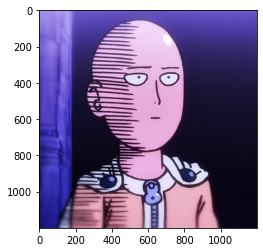

Array de la imagen original:
 [[[163 149 234]
  [163 149 234]
  [163 149 234]
  ...
  [108  90 198]
  [108  90 198]
  [108  90 198]]

 [[163 149 234]
  [163 149 234]
  [163 149 234]
  ...
  [107  89 197]
  [107  89 197]
  [107  89 197]]

 [[163 149 234]
  [163 149 234]
  [163 149 234]
  ...
  [107  89 197]
  [107  89 197]
  [107  89 197]]

 ...

 [[ 18  17  87]
  [ 19  18  88]
  [ 19  17  90]
  ...
  [  8   7  25]
  [  8   7  25]
  [  8   7  25]]

 [[ 18  17  87]
  [ 19  18  88]
  [ 19  17  90]
  ...
  [  8   7  25]
  [  8   7  25]
  [  8   7  25]]

 [[ 18  17  87]
  [ 19  18  88]
  [ 19  17  90]
  ...
  [  8   7  25]
  [  8   7  25]
  [  8   7  25]]]
Forma de la imagen original:
 (1200, 1200, 3)
Array de la imagen 'aplanada':
 [163 149 234 ...   8   7  25]
Forma de la imagen 'aplanada':
 (4320000,)


In [11]:
"""
Crea una función que aplane la ruta de una imágen
"""
import numpy as np
import matplotlib.pyplot as plt

ruta = '/content/onepunchman.jpg'

img = plt.imread(ruta)
plt.imshow(img)
plt.show()

print("Array de la imagen original:\n", img)
print("Forma de la imagen original:\n", np.shape(img))

img_vector = img.flatten()

print("Array de la imagen 'aplanada':\n", img_vector)
print("Forma de la imagen 'aplanada':\n", np.shape(img_vector))